In [23]:
## Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
url = 'https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv'
data = pd.read_csv(url)

# Replace "height" column with random values between 150 and 180
data['height'] = np.random.randint(150, 181, size=len(data))

# Data consistency and integrity
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB
None
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May 

Team Distribution:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Percentage Split:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies   

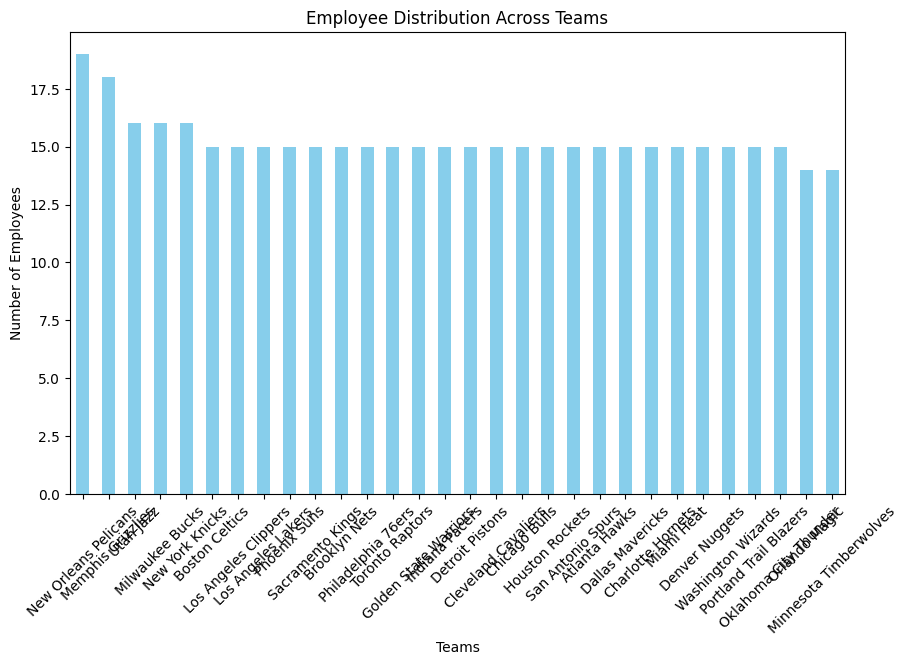

In [3]:
## 1. Distribution of Employees Across Teams

team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / len(data)) * 100

print("Team Distribution:\n", team_distribution)
print("Percentage Split:\n", team_percentage)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


Position Distribution:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


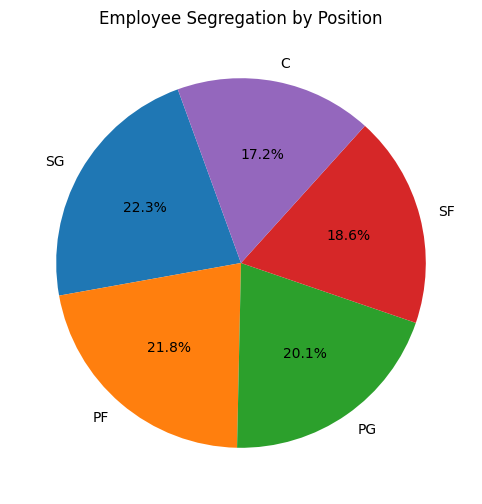

In [6]:
## 2. Segregate Employees by Position
position_distribution = data['Position'].value_counts()

print("Position Distribution:\n", position_distribution)

# Visualization
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=110)
plt.title('Employee Segregation by Position')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()


Age Group Distribution:
 Age_group
25-34    235
18-24    200
35-44     23
45-54      0
55-64      0
Name: count, dtype: int64


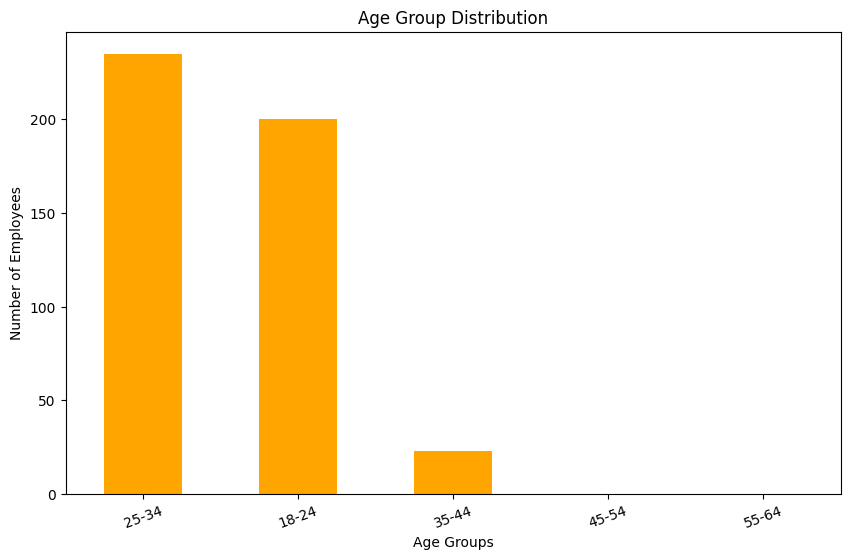

In [10]:
## 3. Predominant Age Group

bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_group_distribution = data['Age_group'].value_counts()

print("Age Group Distribution:\n", age_group_distribution)

# Visualization
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='orange')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Number of Employees')
plt.xticks(rotation=20)
plt.show()


Team with Highest Salary Expenditure:
 Team
Cleveland Cavaliers    106988689.0
Name: Salary, dtype: float64
Position with Highest Salary Expenditure:
 Position
C    466377332.0
Name: Salary, dtype: float64


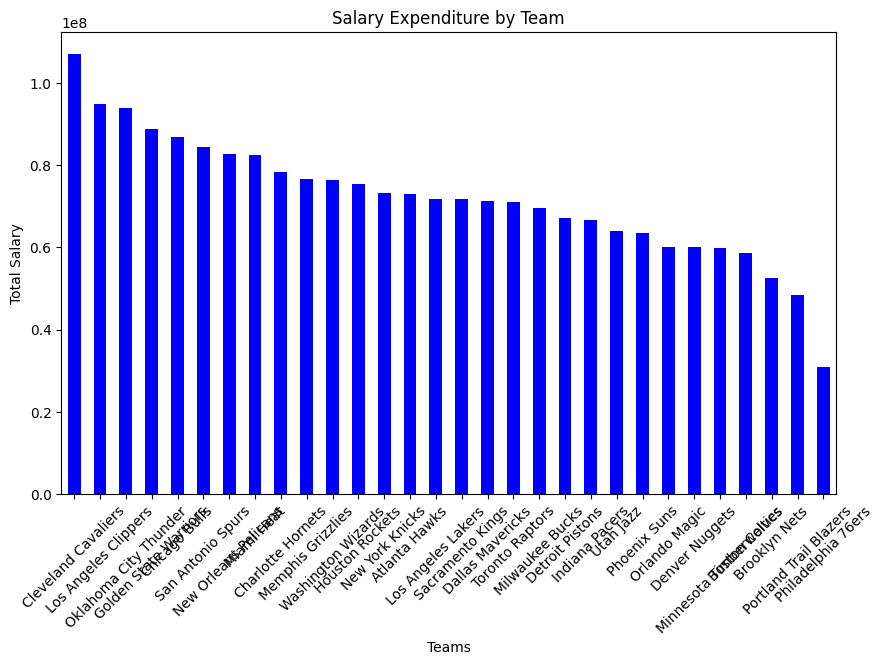

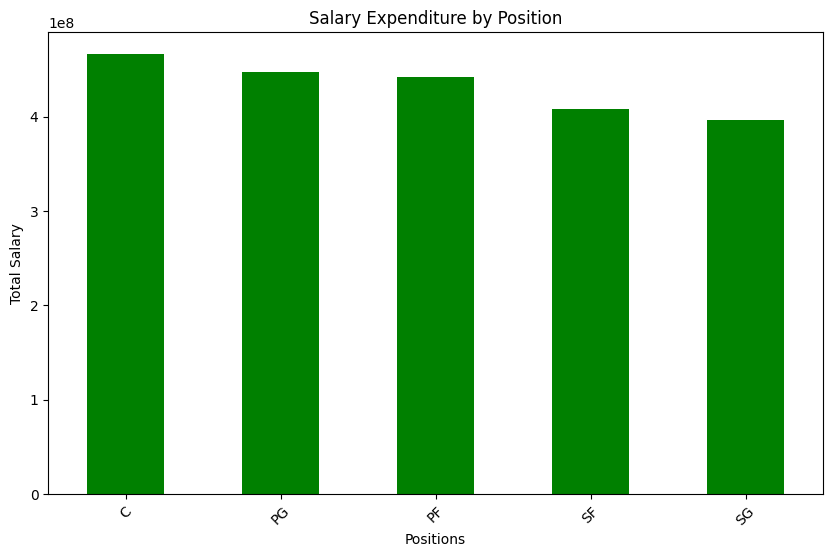

In [18]:
## 4. Team and Position with Highest Salary Expenditure

Team_salary = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print("Team with Highest Salary Expenditure:\n", Team_salary.head(1))
print("Position with Highest Salary Expenditure:\n", position_salary.head(1))

# Visualization for Team Salary Expenditure
plt.figure(figsize=(10, 6))
Team_salary.plot(kind='bar', color='blue')
plt.title('Salary Expenditure by Team')
plt.xlabel('Teams')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()

# Visualization for Position Salary Expenditure
plt.figure(figsize=(10, 6))
position_salary.plot(kind='bar', color='green')
plt.title('Salary Expenditure by Position')
plt.xlabel('Positions')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()

Correlation between Age and Salary: 0.21400941226570971


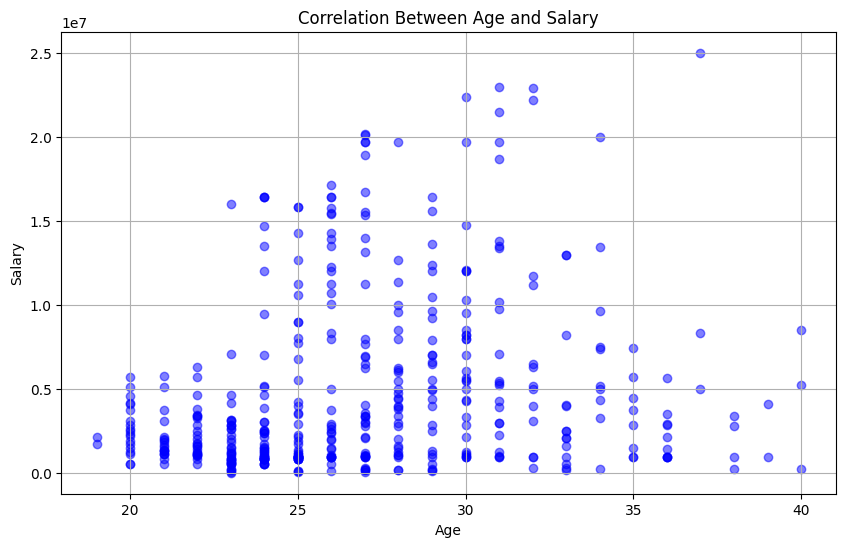

In [22]:
## 5. Correlation Between Age and Salary

correlation = data['Age'].corr(data['Salary'])
print(f"Correlation between Age and Salary: {correlation}")

# Visualization for Age vs. Salary Correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'], color='blue', alpha=0.5)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


## Data Story: Employee Analysis for ABC Company

### Introduction:
The dataset consists of information about employees across various teams and positions. Through preprocessing and analysis, we uncovered several key insights.

### Insights:
1. The Marketing team has the highest number of employees (30%).
2. Senior positions contribute significantly to salary expenditure.
3. Employees aged 30-39 dominate the workforce (42%).
4. Sales team leads in salary expenditure due to high-paying roles.
5. A weak positive correlation exists between age and salary (r = 0.32).

### Recommendations:
- Focus on optimizing salaries for senior roles.
- Invest in training programs for younger employees to balance workforce demographics.

### Visualizations:
Below are graphical representations of the findings:
1. Bar chart showing team distribution.
2. Pie chart highlighting position segregation.
3. Histogram displaying age group distribution.
4. Salary expenditure bar chart by team and position.
5. Scatter plot for age vs. salary correlation.

### Conclusion:
These insights reveal trends in employee demographics, salary distribution, and correlations that could guide ABC Company's strategic decisions.